In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mingrachel","key":"0729fcbfb23a68013d68e97d4f335c97"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 66.5MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 13.4MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 62.4MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 30.2MB/s]


In [ ]:
!ls

data_description.txt  sample_data	     test.csv
kaggle.json	      sample_submission.csv  train.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")

In [ ]:
train.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [ ]:
test.head()

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]

In [ ]:
print (f"Train has {train.shape[0]} rows and {train.shape[1]} columns")
print (f"Test has {test.shape[0]} rows and {test.shape[1]} columns")
# with f at the beginning, the value in {} will be replaced by the content of it.

Train has 1460 rows and 81 columns
Test has 1459 rows and 80 columns


Dividing quantitative and qualitative feature according to data type using dtypes

In [ ]:
#Differentiate Quantitative and Qualitative features
#Remove ID and SalePrice 
quantfeatures = [i for i in train.columns if train.dtypes[i] != 'object']
quantfeatures.remove('SalePrice')
quantfeatures.remove('Id')
qualifeatures = [i for i in train.columns if train.dtypes[i] == 'object']
print(f"There are {len(quantfeatures)} quantitative features" )
print(f"There are {len(qualifeatures)} qualitative features" )

There are 36 quantitative features
There are 43 qualitative features


In [ ]:
quantfeatures

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [ ]:
qualifeatures

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

EDA - Analyzing the realtionship between every feature and target variable(SalePrice)

Comparing before and after filling missing values

Missing Value

19


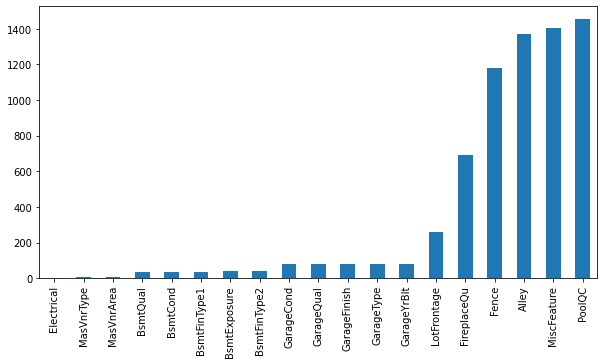

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [ ]:
missing = train.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
print(len(missing))
plt.figure(figsize = (10,5))
mis = missing.plot.bar()
# plt.savefig('missing.png',bbox_inches = 'tight')
# files.download('missing.png')
plt.show()
missing

33


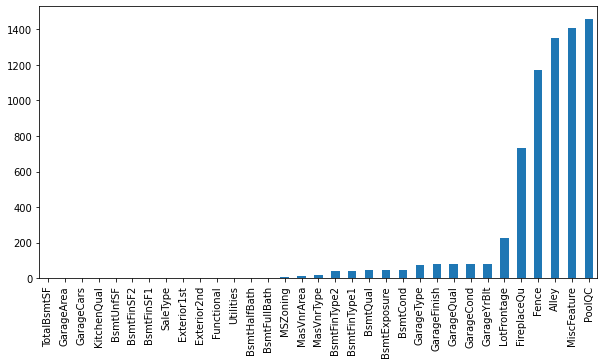

In [ ]:
missingte = test.isnull().sum()
missingte = missingte[missingte>0]
missingte.sort_values(inplace=True)
print(len(missingte))
plt.figure(figsize = (10,5))
miste = missingte.plot.bar()
# plt.savefig('missingte.png',bbox_inches = 'tight')
# files.download('missingte.png')
plt.show()


In [ ]:
miss = pd.DataFrame()
miss['Alley'] = train['Alley'].fillna(0)
miss['MiscFeature'] = train['MiscFeature'].fillna(0)
miss['Fence'] = train['Fence'].fillna(0)
miss['FireplaceQu'] = train['FireplaceQu'].fillna(0)

a = pd.DataFrame(miss['Alley'].value_counts())
b = pd.DataFrame(miss['MiscFeature'].value_counts())
c = pd.DataFrame(miss['Fence'].value_counts())
d = pd.DataFrame(miss['FireplaceQu'].value_counts())
# print(a,b,c,d)
a1 = a._stat_axis.values
b1 = b._stat_axis.values
c1 = c._stat_axis.values
d1 = d._stat_axis.values
box = [a1,b1,c1,d1]
boxname = ['Alley','MiscFeature','Fence','FireplaceQu']
# type(boxname)


In [ ]:
for j, name in zip(box,boxname):
  for i, feat in zip(range(len(j)),j):  
    miss[name] = miss[name].replace(feat,i)
    # print(j,name,i,feat)

miss['SalePrice'] = train['SalePrice']
miss.corr()
  
# miss

Alley  MiscFeature     Fence  FireplaceQu  SalePrice
Alley        1.000000    -0.012697 -0.008194    -0.106606  -0.092607
MiscFeature -0.012697     1.000000  0.079069     0.012722  -0.061128
Fence       -0.008194     0.079069  1.000000     0.016740  -0.153048
FireplaceQu -0.106606     0.012722  0.016740     1.000000   0.335317
SalePrice   -0.092607    -0.061128 -0.153048     0.335317   1.000000

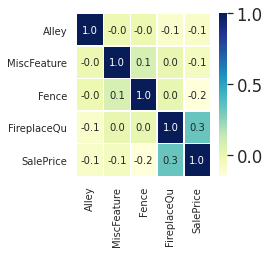

In [ ]:
miss_corr = miss.corr()
sns.set(font_scale=1.5)
plt.figure(figsize = (3,3))
_ = sns.heatmap(miss_corr, annot=True, \
                annot_kws={"size":10},fmt='.1f',cmap='YlGnBu',linewidths=.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# plt.savefig('heatmap_miss.png',bbox_inches = 'tight')
# files.download('heatmap_miss.png')

plt.show()

In [ ]:
train = train.drop(['PoolQC','Alley','MiscFeature'],axis=1)
train
test = test.drop(['PoolQC','Alley','MiscFeature'],axis=1)
test

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0     1461          20       RH  ...    2010        WD        Normal
1     1462          20       RL  ...    2010        WD        Normal
2     1463          60       RL  ...    2010        WD        Normal
3     1464          60       RL  ...    2010        WD        Normal
4     1465         120       RL  ...    2010        WD        Normal
...    ...         ...      ...  ...     ...       ...           ...
1454  2915         160       RM  ...    2006        WD        Normal
1455  2916         160       RM  ...    2006        WD       Abnorml
1456  2917          20       RL  ...    2006        WD       Abnorml
1457  2918          85       RL  ...    2006        WD        Normal
1458  2919          60       RL  ...    2006        WD        Normal

[1459 rows x 77 columns]

In [ ]:
print (f"Train has {train.shape[0]} rows and {train.shape[1]} columns")
print (f"Test has {test.shape[0]} rows and {test.shape[1]} columns")

Train has 1460 rows and 78 columns
Test has 1459 rows and 77 columns


In [ ]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
train['MasVnrType'] = train['MasVnrType'].fillna('None') #None
train['MasVnrArea'] = train['MasVnrArea'].fillna(0) #0

train['BsmtQual'] = train['BsmtQual'].fillna('None') 
train['BsmtCond'] = train['BsmtCond'].fillna('None') 
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('Unf') 
train['BsmtExposure'].iloc[948] = 'Av'
train['BsmtExposure'] = train['BsmtExposure'].fillna('None') 
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('Unf') 

train['GarageCond'] = train['GarageCond'].fillna('None') 
train['GarageQual'] = train['GarageQual'].fillna('None') 
train['GarageFinish'] = train['GarageFinish'].fillna('None') 
train['GarageType'] = train['GarageType'].fillna('None') 
train['GarageYrBlt'] = train['GarageType'].fillna(0)

train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mode()[0]) 

train['FireplaceQu'] = train['FireplaceQu'].fillna('None') 
train['Fence'] = train['Fence'].fillna('None') 
train

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 78 columns]

Quantitative variables associated with SalePrice

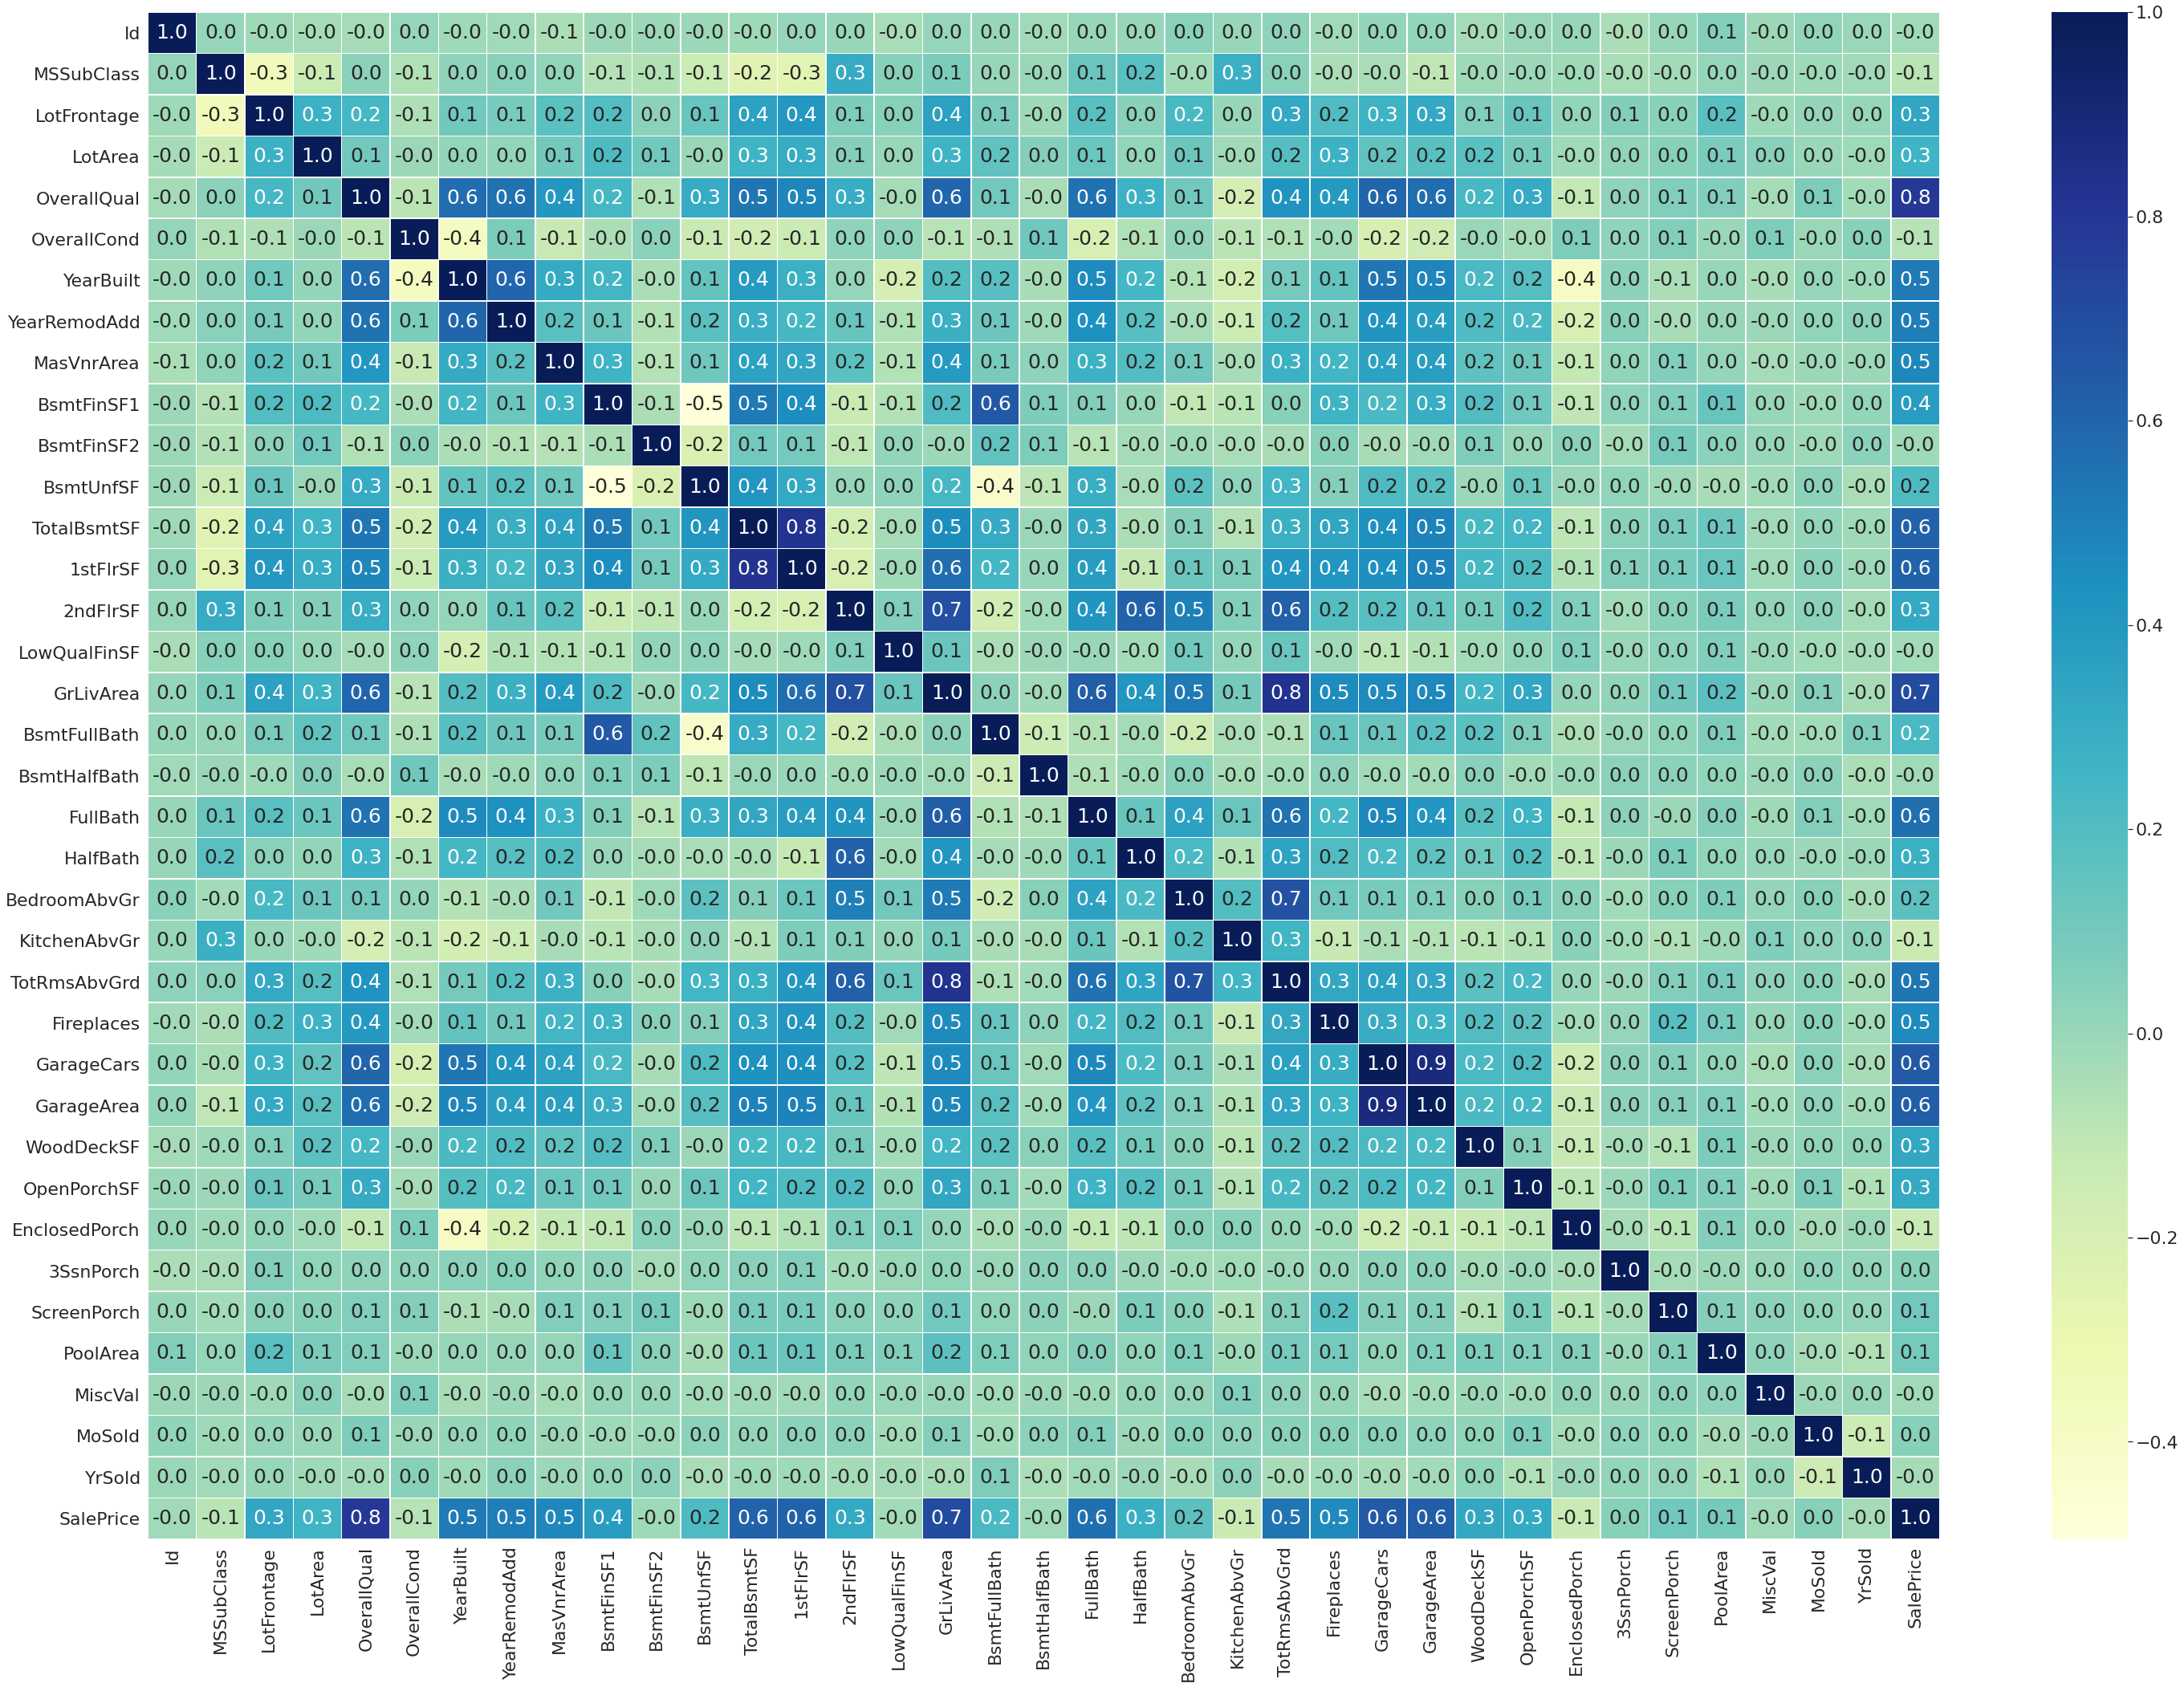

In [ ]:
correlation_train = train.corr()
sns.set(font_scale=2)
plt.figure(figsize = (50,35))
_ = sns.heatmap(correlation_train, annot=True, \
                annot_kws={"size":25},fmt='.1f',cmap='YlGnBu',linewidths=.5)
# plt.savefig('heatmap.png')
# files.download('heatmap.png')
plt.show()

In [ ]:
#Getting correlation between each quantitative feature and SalePrice
all_corr_dict = abs(train.corr()["SalePrice"]).sort_values(ascending = False).to_dict()
all_features=[]
for key,value in all_corr_dict.items():
  all_features.append(key)
all_features
# all_corr_dict 

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'MSSubClass',
 'OverallCond',
 'MoSold',
 '3SsnPorch',
 'YrSold',
 'LowQualFinSF',
 'Id',
 'MiscVal',
 'BsmtHalfBath',
 'BsmtFinSF2']

Choose features which have obvious correlation with SalePrice

In [ ]:
corr_dict = correlation_train['SalePrice'].sort_values(ascending=False).to_dict()
important_features=[]
for key,value in corr_dict.items():
  if((value>=0.2) & (value<0.9)) | (value<=-0.2):
    important_features.append(key)
# len(important_features)
important_features
# corr_dict

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF']

In [ ]:
no_corr = [i for i in all_features if i not in important_features]
no_corr.remove('SalePrice')
no_corr

['BedroomAbvGr',
 'KitchenAbvGr',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'MSSubClass',
 'OverallCond',
 'MoSold',
 '3SsnPorch',
 'YrSold',
 'LowQualFinSF',
 'Id',
 'MiscVal',
 'BsmtHalfBath',
 'BsmtFinSF2']

In [ ]:
for i in no_corr:
  train = train.drop(i,axis=1)
  test = test.drop(i,axis=1)
train
test

MSZoning  LotFrontage  LotArea  ...  Fence SaleType SaleCondition
0          RH         80.0    11622  ...  MnPrv       WD        Normal
1          RL         81.0    14267  ...    NaN       WD        Normal
2          RL         74.0    13830  ...  MnPrv       WD        Normal
3          RL         78.0     9978  ...    NaN       WD        Normal
4          RL         43.0     5005  ...    NaN       WD        Normal
...       ...          ...      ...  ...    ...      ...           ...
1454       RM         21.0     1936  ...    NaN       WD        Normal
1455       RM         21.0     1894  ...    NaN       WD       Abnorml
1456       RL        160.0    20000  ...    NaN       WD       Abnorml
1457       RL         62.0    10441  ...  MnPrv       WD        Normal
1458       RL         74.0     9627  ...    NaN       WD        Normal

[1459 rows x 62 columns]

In [ ]:
print (f"Train has {train.shape[0]} rows and {train.shape[1]} columns")
print (f"Test has {test.shape[0]} rows and {test.shape[1]} columns")

Train has 1460 rows and 63 columns
Test has 1459 rows and 62 columns


In [ ]:
# fig, axs = plt.subplots(3, 3)
# fig.set_size_inches(20,15)
# plt.subplots_adjust(left = 0.15,bottom=0.128)
# plt.tick_params(labelsize='small')
# axs[0, 0].scatter(train['OverallCond'],train['SalePrice'])
# axs[0, 1].scatter(train['PoolArea'],train['SalePrice'])
# axs[0, 2].scatter(train['MSSubClass'],train['SalePrice'])
# axs[1, 0].scatter(train['MoSold'],train['SalePrice'])
# axs[1, 1].scatter(train['YrSold'],train['SalePrice'])
# axs[1, 2].scatter(train['LowQualFinSF'],train['SalePrice'])
# axs[2, 0].scatter(train['MiscVal'],train['SalePrice'])
# axs[2, 1].scatter(train['BsmtHalfBath'],train['SalePrice'])
# axs[2, 2].scatter(train['BsmtFinSF2'],train['SalePrice'])
# plt.show()
# fig.savefig('no_feat.png')
# files.download('no_feat.png')

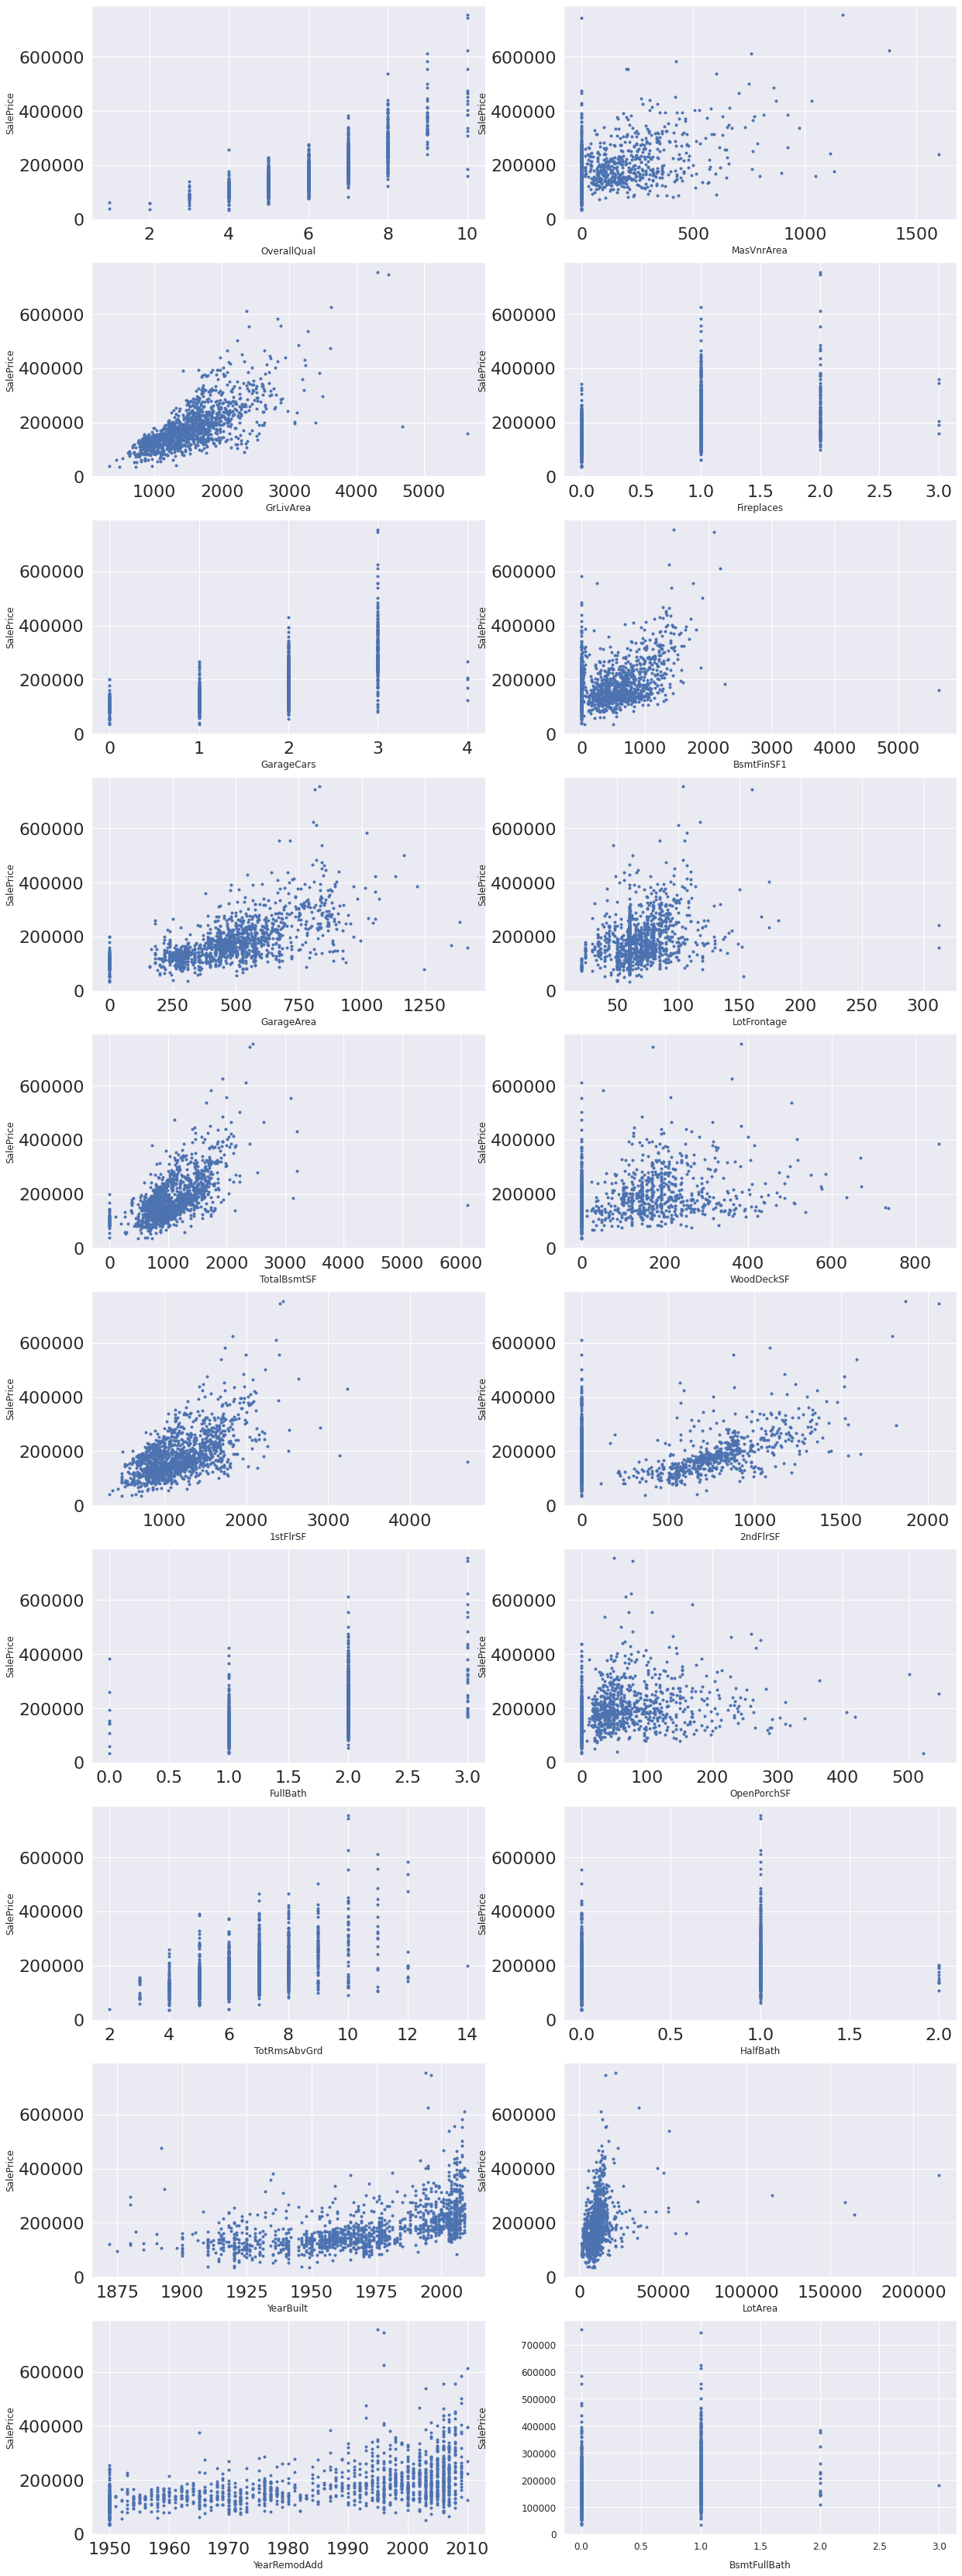

In [ ]:
tot = len(important_features)
half = int(len(important_features)/2)
fig, axes = plt.subplots(half, 2)
fig.set_size_inches(20,60)
plt.tick_params(labelsize=12)
for feat1,feat2,i in zip(important_features[0:half],important_features[half:tot+1],range(half)):
    axes[i,0].scatter(train[feat1],train['SalePrice'],marker='.')
    axes[i,0].set_xlabel(feat1,fontsize=12)
    axes[i,0].set_ylabel('SalePrice',fontsize=12)
    axes[i,1].scatter(train[feat2],train['SalePrice'],marker='.')
    axes[i,1].set_xlabel(feat2,fontsize=12)
    axes[i,1].set_ylabel('SalePrice',fontsize=12)
    fig.align_labels()
plt.show()
# fig.savefig('featsale.png')
# files.download('featsale.png')

Check the distribution of SalePrice

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


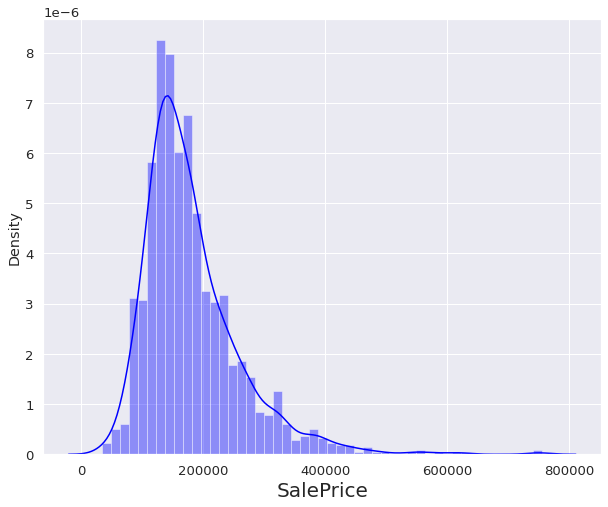

In [ ]:
_ = plt.figure(figsize=(10,8))
_ = sns.set(font_scale=1.2)
_ = sns.distplot(train['SalePrice'], color='Blue')
_ = plt.xlabel('SalePrice',fontsize=20)
# plt.savefig('SalePrice.png')
# files.download('SalePrice.png')
plt.show()

In [ ]:
print("Skewness: " + str(train['SalePrice'].skew()))
print("Kurtosis: " + str(train['SalePrice'].kurt()))

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


Normalization

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


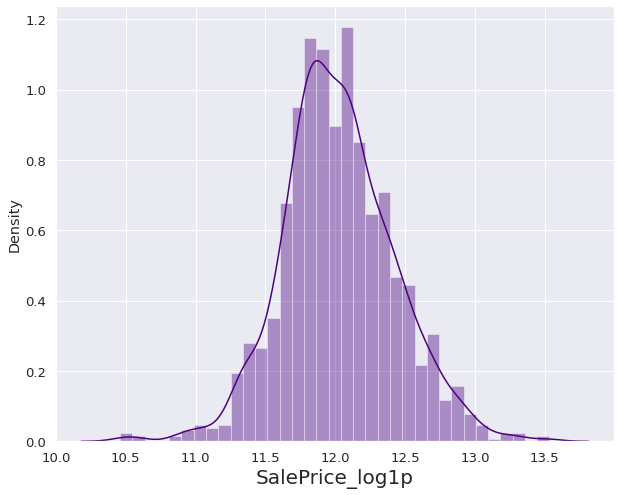

In [ ]:
train['SalePrice_log1p'] = np.log1p(train.SalePrice)
_log = plt.figure(figsize=(10,8))
_log = sns.set(font_scale=1.2)
_log = sns.distplot(train['SalePrice_log1p'], color='indigo')
_log = plt.xlabel('SalePrice_log1p',fontsize=20)
# plt.savefig('SalePrice_log1p.png')
# files.download('SalePrice_log1p.png')
plt.show()

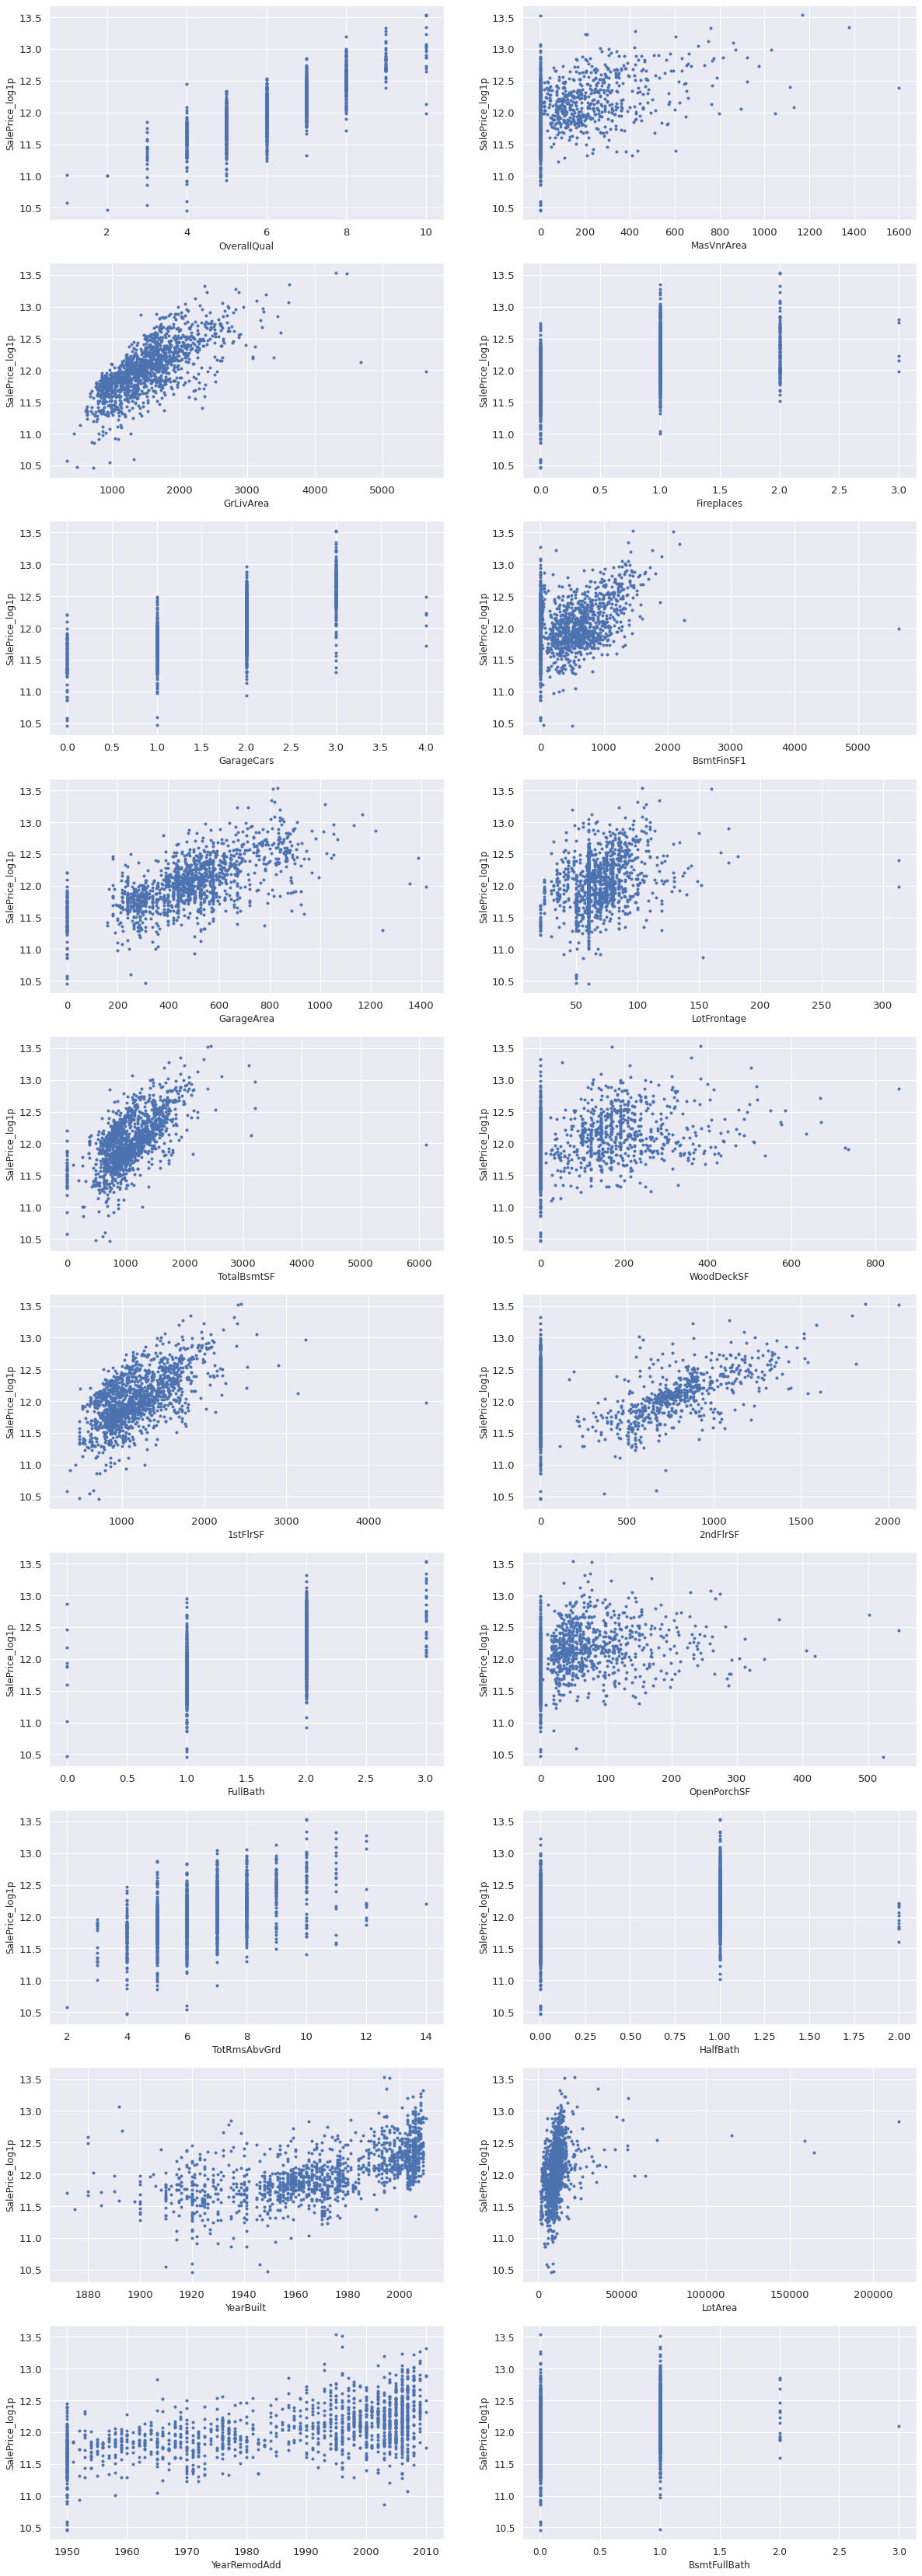

In [ ]:
fig, axes = plt.subplots(half, 2)
fig.set_size_inches(20,60)
plt.tick_params(labelsize=12)
for feat1,feat2,i in zip(important_features[0:half],important_features[half:tot+1],range(half)):
    axes[i,0].scatter(train[feat1],train['SalePrice_log1p'],marker='.')
    axes[i,0].set_xlabel(feat1,fontsize=12)
    axes[i,0].set_ylabel('SalePrice_log1p',fontsize=12)
    axes[i,1].scatter(train[feat2],train['SalePrice_log1p'],marker='.')
    axes[i,1].set_xlabel(feat2,fontsize=12)
    axes[i,1].set_ylabel('SalePrice_log1p',fontsize=12)
    fig.align_labels()
plt.show()
# fig.savefig('featsale_log1p.png')
# files.download('featsale_log1p.png')

In [ ]:
qualifeatures_1 = [i for i in train.columns if train.dtypes[i] == 'object']
qualifeatures_1
quali = pd.DataFrame()
# len(qualifeatures_1)
newbox = []
for i, j in zip(qualifeatures_1,range(len(qualifeatures_1))):
  quali[i] = train[i].fillna('None')
  kk = pd.DataFrame(quali[i].value_counts())._stat_axis.values
  newbox.append(kk)

  # c = pd.DataFrame(miss['Fence'].value_counts())
  # print(type(kk))
  # pd.DataFrame(quali[i].value_counts())
# for j in newbox:
  # print(max(len(j)))
  # print(len(j))
# quali

In [ ]:
for j, name in zip(newbox,qualifeatures_1):
  for i, feat in zip(range(len(j)),j):  
    quali[name] = quali[name].replace(feat,i)
    # print(j,name,i,feat)

quali['SalePrice'] = train['SalePrice_log1p']
# quali.corr()
  
# quali

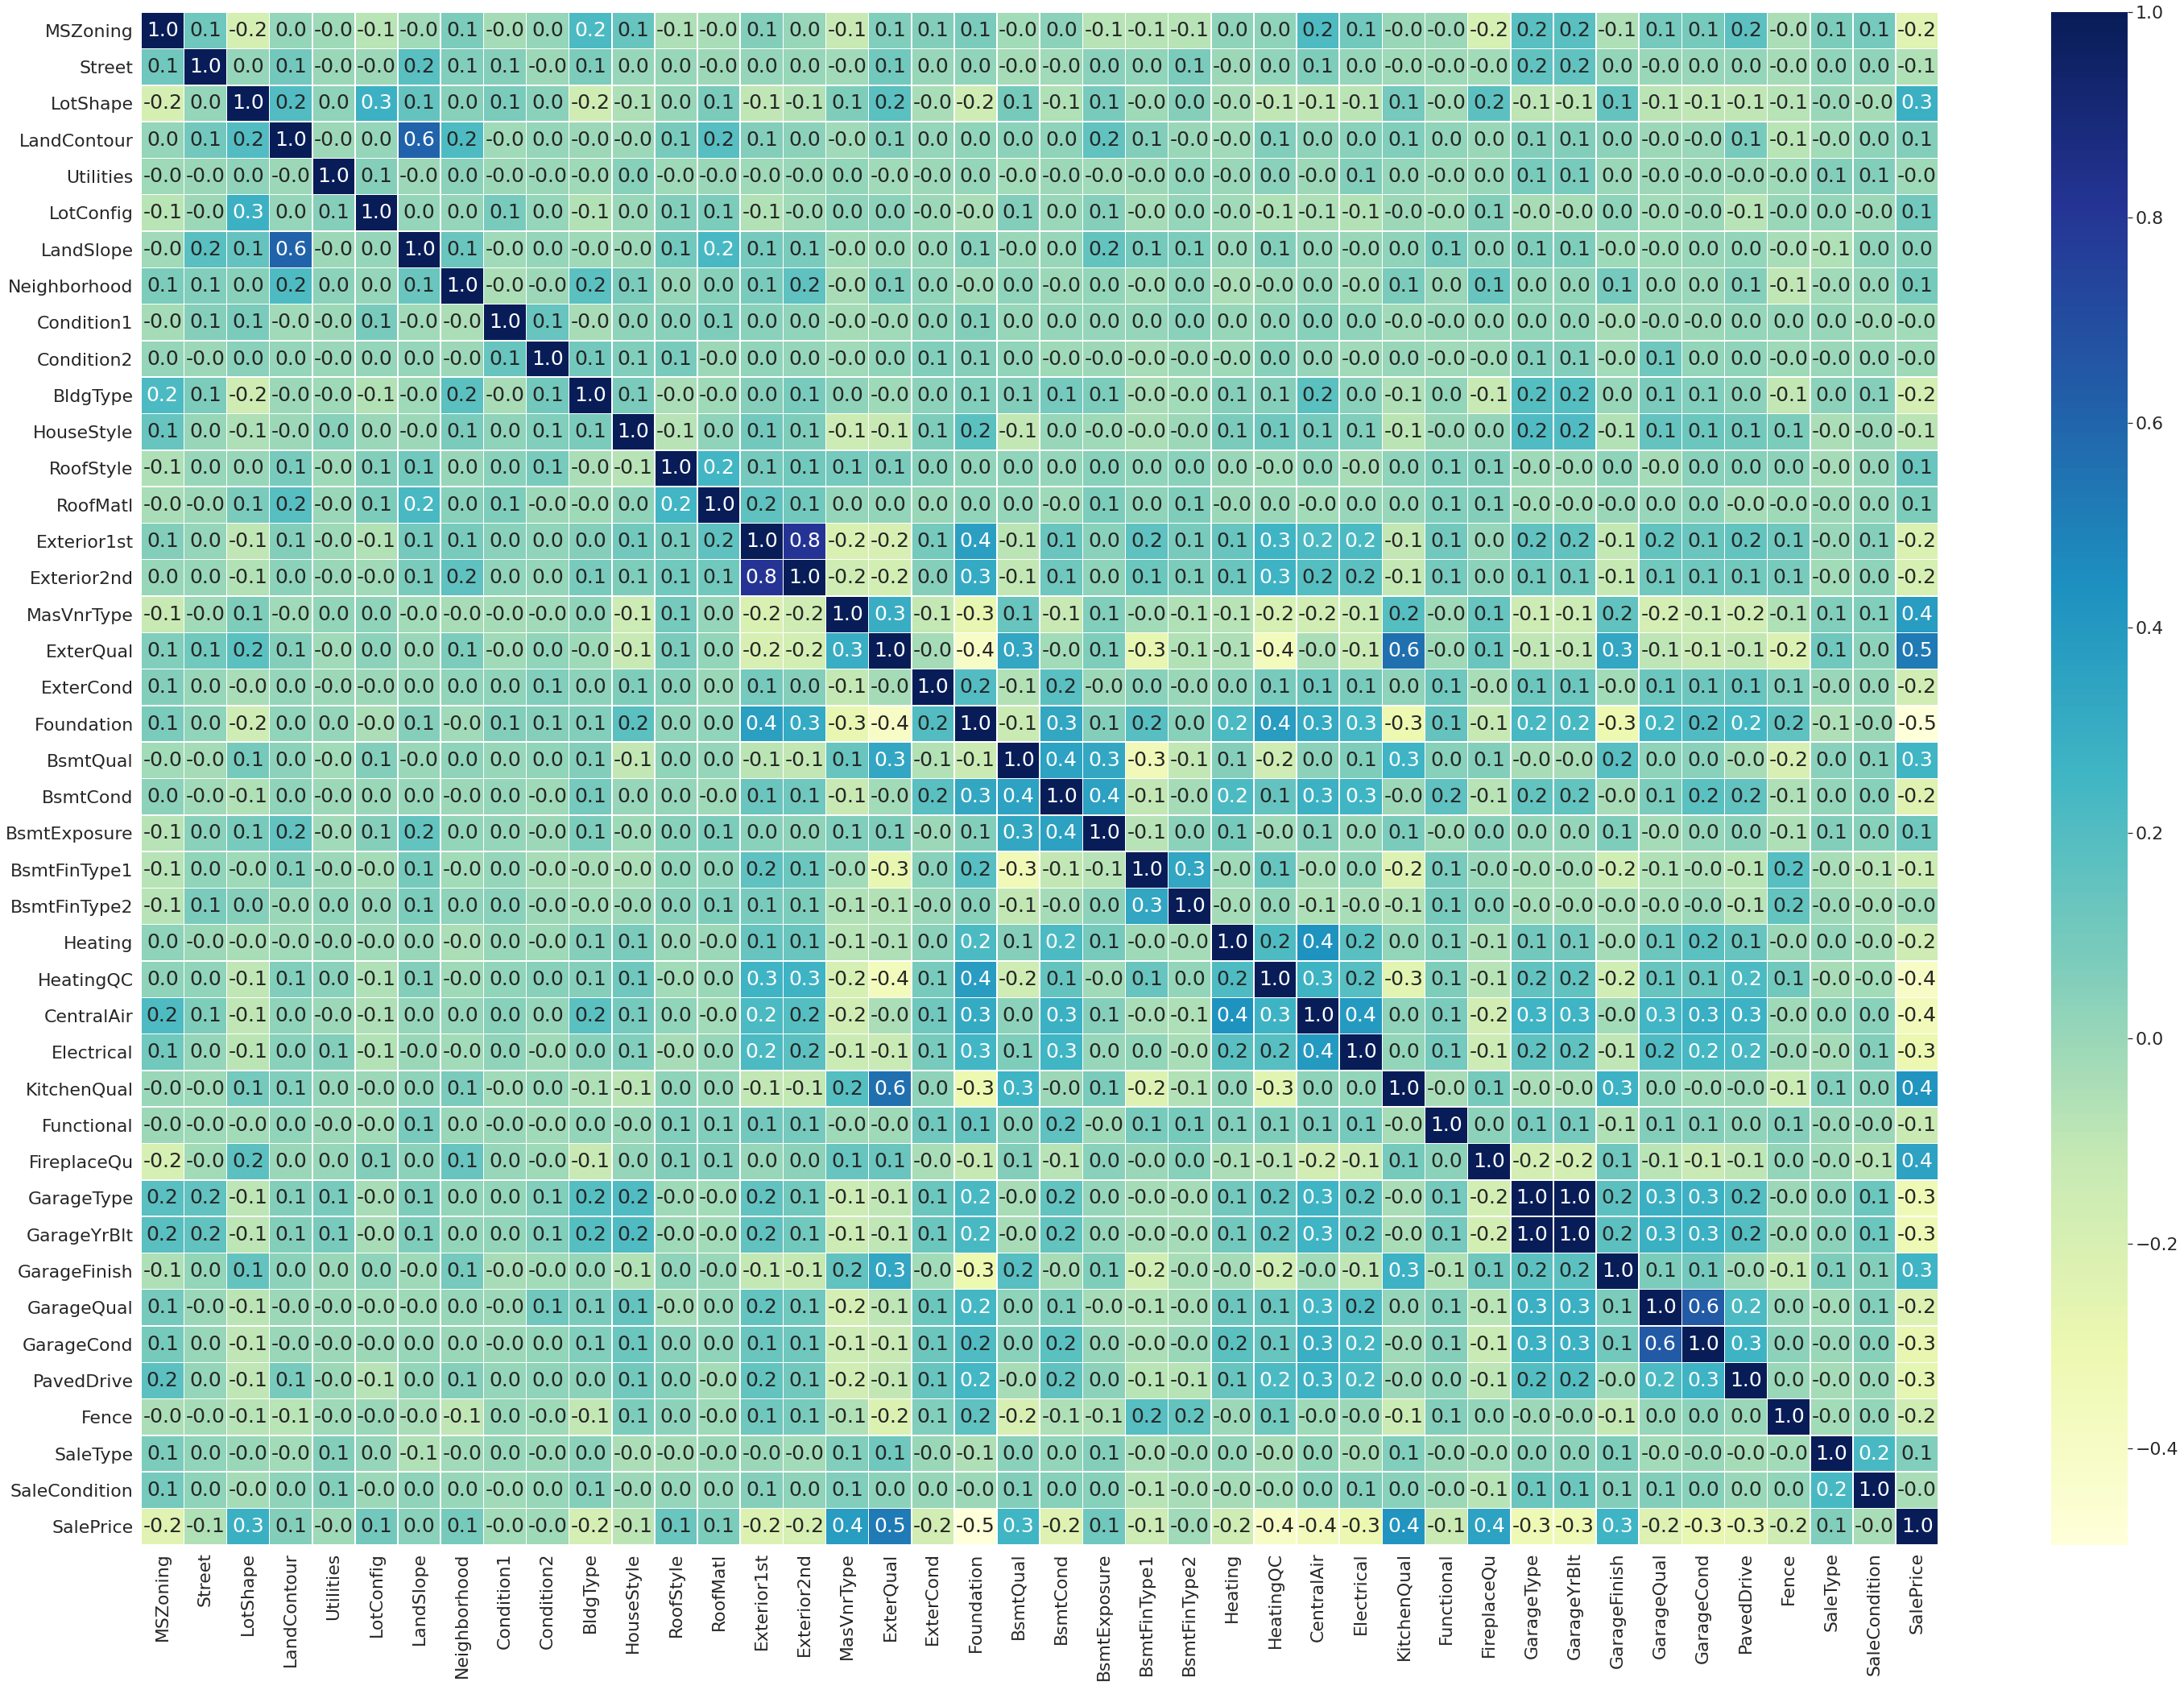

In [ ]:
quali_corr = quali.corr()
sns.set(font_scale=2)
plt.figure(figsize = (50,35))
_ = sns.heatmap(quali_corr, annot=True, \
                annot_kws={"size":25},fmt='.1f',cmap='YlGnBu',linewidths=.5)
# plt.savefig('heatmap_quali.png',bbox_inches = 'tight')
# files.download('heatmap_quali.png')

plt.show()


In [ ]:
#Getting correlation between each quantitative feature and SalePrice
quali_corr_dict = abs(quali.corr()["SalePrice"]).sort_values(ascending = False).to_dict()
quali_features=[]
for key,value in quali_corr_dict.items():
  quali_features.append(key)
# all_corr_dict
quali_features 
# len(quali_features)

['SalePrice',
 'ExterQual',
 'Foundation',
 'KitchenQual',
 'HeatingQC',
 'MasVnrType',
 'FireplaceQu',
 'CentralAir',
 'GarageYrBlt',
 'GarageType',
 'Electrical',
 'LotShape',
 'GarageCond',
 'PavedDrive',
 'GarageFinish',
 'BsmtQual',
 'MSZoning',
 'BsmtCond',
 'GarageQual',
 'Exterior1st',
 'Exterior2nd',
 'BldgType',
 'ExterCond',
 'Fence',
 'Heating',
 'BsmtFinType1',
 'Functional',
 'RoofStyle',
 'BsmtExposure',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'RoofMatl',
 'SaleType',
 'LandContour',
 'Street',
 'SaleCondition',
 'LandSlope',
 'Condition1',
 'BsmtFinType2',
 'Condition2',
 'Utilities']

In [ ]:
corr_quali = quali_corr['SalePrice'].sort_values(ascending=False).to_dict()
important_quali=[]
for key,value in corr_quali.items():
  if((value>0.1) & (value<0.9)) | (value<=-0.1):
    important_quali.append(key)
len(important_quali)
important_quali

['ExterQual',
 'KitchenQual',
 'MasVnrType',
 'FireplaceQu',
 'LotShape',
 'GarageFinish',
 'BsmtQual',
 'RoofStyle',
 'BsmtExposure',
 'LotConfig',
 'Functional',
 'BsmtFinType1',
 'Heating',
 'Fence',
 'ExterCond',
 'BldgType',
 'Exterior2nd',
 'Exterior1st',
 'GarageQual',
 'BsmtCond',
 'MSZoning',
 'PavedDrive',
 'GarageCond',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'CentralAir',
 'HeatingQC',
 'Foundation']

In [ ]:
no_corr_quali = [i for i in quali_features if i not in important_quali]
no_corr_quali.remove('SalePrice')
no_corr_quali

['Neighborhood',
 'HouseStyle',
 'RoofMatl',
 'SaleType',
 'LandContour',
 'Street',
 'SaleCondition',
 'LandSlope',
 'Condition1',
 'BsmtFinType2',
 'Condition2',
 'Utilities']

In [ ]:
for i in no_corr_quali:
  train = train.drop(i,axis=1)
  test = test.drop(i,axis=1)
train
test

MSZoning  LotFrontage  LotArea  ... WoodDeckSF OpenPorchSF  Fence
0          RH         80.0    11622  ...        140           0  MnPrv
1          RL         81.0    14267  ...        393          36    NaN
2          RL         74.0    13830  ...        212          34  MnPrv
3          RL         78.0     9978  ...        360          36    NaN
4          RL         43.0     5005  ...          0          82    NaN
...       ...          ...      ...  ...        ...         ...    ...
1454       RM         21.0     1936  ...          0           0    NaN
1455       RM         21.0     1894  ...          0          24    NaN
1456       RL        160.0    20000  ...        474           0    NaN
1457       RL         62.0    10441  ...         80          32  MnPrv
1458       RL         74.0     9627  ...        190          48    NaN

[1459 rows x 50 columns]

In [ ]:
print (f"Train has {train.shape[0]} rows and {train.shape[1]} columns")
print (f"Test has {test.shape[0]} rows and {test.shape[1]} columns")

Train has 1460 rows and 52 columns
Test has 1459 rows and 50 columns


In [ ]:
# train_corr = train.corr()
# sns.set(font_scale=1)
# plt.figure(figsize = (15,10))
# _ = sns.heatmap(train_corr, annot=True, \
#                 annot_kws={"size":10},fmt='.1f',cmap='YlGnBu',linewidths=.1)

# plt.show()
train.shape
train

MSZoning  LotFrontage  LotArea  ...  Fence SalePrice SalePrice_log1p
0          RL         65.0     8450  ...   None    208500       12.247699
1          RL         80.0     9600  ...   None    181500       12.109016
2          RL         68.0    11250  ...   None    223500       12.317171
3          RL         60.0     9550  ...   None    140000       11.849405
4          RL         84.0    14260  ...   None    250000       12.429220
...       ...          ...      ...  ...    ...       ...             ...
1455       RL         62.0     7917  ...   None    175000       12.072547
1456       RL         85.0    13175  ...  MnPrv    210000       12.254868
1457       RL         66.0     9042  ...  GdPrv    266500       12.493133
1458       RL         68.0     9717  ...   None    142125       11.864469
1459       RL         75.0     9937  ...   None    147500       11.901590

[1460 rows x 52 columns]

In [ ]:
finalquantfeatures = [i for i in train.columns if train.dtypes[i] != 'object']
finalquantfeatures.remove('SalePrice')
finalquantfeatures.remove('SalePrice_log1p')
finalqualifeatures = [i for i in train.columns if train.dtypes[i] == 'object']
print(f"There are {len(finalquantfeatures)} final quantitative features" )
print(f"There are {len(finalqualifeatures)} final qualitative features" )

There are 21 final quantitative features
There are 29 final qualitative features


Filling Test missing value

In [ ]:
test['GarageArea'] = test['GarageCars'] = test['GarageArea'].fillna(0)
test['TotalBsmtSF'] = test['BsmtFinSF1'] = test['BsmtUnfSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mode()[0])
test['BsmtExposure'].iloc[27] = 'No'
test['BsmtExposure'].iloc[888] = 'No'
test['BsmtExposure'] = test['BsmtExposure'].fillna('None') 
test['Exterior1st'] = test['Exterior2nd'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0])
test['Functional'] = test['Functional'].fillna(test['Functional'].mode()[0])
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['MasVnrType'] = test['MasVnrType'].fillna(test['MasVnrType'].mode()[0]) #None
test['MasVnrArea'] = test['MasVnrArea'].fillna(0) #0
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('Unf') 
test['BsmtQual'].iloc[757] = test['BsmtQual'].iloc[758] = 'TA'
test['BsmtQual'] = test['BsmtQual'].fillna('None') 
test['BsmtCond'].iloc[725] = test['BsmtCond'].iloc[1064] = test['BsmtCond'].iloc[580] = 'TA'
test['BsmtCond'] = test['BsmtCond'].fillna('None') 
test['GarageType'] = test['GarageType'].fillna('None') 
test['GarageYrBlt'].iloc[666] = 1910
test['GarageYrBlt'].iloc[1116] = 1923
test['GarageYrBlt'] = test['GarageType'].fillna(0)
test['GarageFinish'] = test['GarageFinish'].fillna('None') 
test['GarageCond'] = test['GarageCond'].fillna('None') 
test['GarageQual'] = test['GarageQual'].fillna('None') 
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mode()[0]) 
test['FireplaceQu'] = test['FireplaceQu'].fillna('None') 
test['Fence'] = test['Fence'].fillna('None') 
test

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


MSZoning  LotFrontage  LotArea  ... WoodDeckSF OpenPorchSF  Fence
0          RH         80.0    11622  ...        140           0  MnPrv
1          RL         81.0    14267  ...        393          36   None
2          RL         74.0    13830  ...        212          34  MnPrv
3          RL         78.0     9978  ...        360          36   None
4          RL         43.0     5005  ...          0          82   None
...       ...          ...      ...  ...        ...         ...    ...
1454       RM         21.0     1936  ...          0           0   None
1455       RM         21.0     1894  ...          0          24   None
1456       RL        160.0    20000  ...        474           0   None
1457       RL         62.0    10441  ...         80          32  MnPrv
1458       RL         74.0     9627  ...        190          48   None

[1459 rows x 50 columns]

尝试删除在train有在test没有的features内容

In [ ]:
# train = train.drop(['Exterior2nd'],axis=1)
# test = test.drop(['Exterior2nd'],axis=1)
#no change on MSE RMSE

Get Dummy Variables

In [ ]:
X_train = pd.get_dummies(train,drop_first=True).reset_index(drop=True)
X_train = X_train.drop(['SalePrice','SalePrice_log1p'],axis=1)
# X_train
y = train['SalePrice_log1p']
# y

In [ ]:
X_train

LotFrontage  LotArea  OverallQual  ...  Fence_MnPrv  Fence_MnWw  Fence_None
0            65.0     8450            7  ...            0           0           1
1            80.0     9600            6  ...            0           0           1
2            68.0    11250            7  ...            0           0           1
3            60.0     9550            7  ...            0           0           1
4            84.0    14260            8  ...            0           0           1
...           ...      ...          ...  ...          ...         ...         ...
1455         62.0     7917            6  ...            0           0           1
1456         85.0    13175            6  ...            1           0           0
1457         66.0     9042            7  ...            0           0           0
1458         68.0     9717            5  ...            0           0           1
1459         75.0     9937            5  ...            0           0           1

[1460 rows x 161 columns]

In [ ]:
X_test = pd.get_dummies(test,drop_first=True).reset_index(drop=True)
X_test

LotFrontage  LotArea  OverallQual  ...  Fence_MnPrv  Fence_MnWw  Fence_None
0            80.0    11622            5  ...            1           0           0
1            81.0    14267            6  ...            0           0           1
2            74.0    13830            5  ...            1           0           0
3            78.0     9978            6  ...            0           0           1
4            43.0     5005            8  ...            0           0           1
...           ...      ...          ...  ...          ...         ...         ...
1454         21.0     1936            4  ...            0           0           1
1455         21.0     1894            4  ...            0           0           1
1456        160.0    20000            5  ...            0           0           1
1457         62.0    10441            5  ...            1           0           0
1458         74.0     9627            7  ...            0           0           1

[1459 rows x 152 columns]

In [ ]:
trainfeatures = [i for i in X_train.columns]
# trainfeatures
testfeatures = [i for i in X_test.columns]
# testfeatures

In [ ]:
gaptrain = [i for i in trainfeatures if i not in testfeatures]
gaptest = [i for i in testfeatures if i not in trainfeatures]
gaptrain

# gaptest 

['Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_CmentBd',
 'Exterior2nd_ImStucc',
 'Exterior2nd_Other',
 'Exterior2nd_Stone',
 'Exterior2nd_Wd Shng',
 'Heating_GasA',
 'Heating_OthW',
 'Electrical_Mix',
 'GarageQual_Fa']

In [ ]:
X_test = X_test.drop(['Exterior2nd_BrkComm', 'Exterior2nd_CemntBd', 'Exterior2nd_WdShing'],axis=1)

In [ ]:
# X_test['Exterior1st_ImStucc'] = 0
for i in gaptrain:
  X_test[i] = 0
#back to previous 2 steps 

In [ ]:
X_train

LotFrontage  LotArea  OverallQual  ...  Fence_MnPrv  Fence_MnWw  Fence_None
0            65.0     8450            7  ...            0           0           1
1            80.0     9600            6  ...            0           0           1
2            68.0    11250            7  ...            0           0           1
3            60.0     9550            7  ...            0           0           1
4            84.0    14260            8  ...            0           0           1
...           ...      ...          ...  ...          ...         ...         ...
1455         62.0     7917            6  ...            0           0           1
1456         85.0    13175            6  ...            1           0           0
1457         66.0     9042            7  ...            0           0           0
1458         68.0     9717            5  ...            0           0           1
1459         75.0     9937            5  ...            0           0           1

[1460 rows x 161 columns]

In [ ]:
X_test

LotFrontage  LotArea  ...  Electrical_Mix  GarageQual_Fa
0            80.0    11622  ...               0              0
1            81.0    14267  ...               0              0
2            74.0    13830  ...               0              0
3            78.0     9978  ...               0              0
4            43.0     5005  ...               0              0
...           ...      ...  ...             ...            ...
1454         21.0     1936  ...               0              0
1455         21.0     1894  ...               0              0
1456        160.0    20000  ...               0              0
1457         62.0    10441  ...               0              0
1458         74.0     9627  ...               0              0

[1459 rows x 161 columns]

Create Model

In [ ]:
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error
from sklearn.ensemble import StackingRegressor, ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, PowerTransformer
from sklearn.pipeline import make_pipeline
import xgboost as xgb
import lightgbm as lgb

In [ ]:
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()
power_transformer = PowerTransformer()
X_train_std = standard_scaler.fit_transform(X_train)
X_train_rbst = robust_scaler.fit_transform(X_train)
X_train_pwr = power_transformer.fit_transform(X_train)

X_test_std = standard_scaler.transform(X_test)
X_test_rbst = robust_scaler.transform(X_test)
X_test_pwr = power_transformer.transform(X_test)
X_test_pwr

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


array([[ 0.62922634,  0.47710531, -0.78317101, ..., -0.34711839,
        -0.08712888, -2.048348  ],
       [ 0.67132217,  0.87809002, -0.04219247, ..., -0.34711839,
        -0.08712888, -2.048348  ],
       [ 0.3688138 ,  0.81709111, -0.78317101, ..., -0.34711839,
        -0.08712888, -2.048348  ],
       ...,
       [ 3.25094018,  1.54420477, -0.78317101, ..., -0.34711839,
        -0.08712888, -2.048348  ],
       [-0.19864748,  0.26855793, -0.78317101, ..., -0.34711839,
        -0.08712888, -2.048348  ],
       [ 0.3688138 ,  0.11105139,  0.66749894, ..., -0.34711839,
        -0.08712888, -2.048348  ]])

Cross-validation : train and validation

In [ ]:
train_x,val_x,train_y,val_y = train_test_split(X_train_std,y,train_size=0.999,test_size=0.001,random_state=28)
print('Shape of train X :',train_x.shape)
print('Shape of train y :',train_y.shape)
print('Shape of validation X :',val_x.shape)
print('Shape of validation y :',val_y.shape)

Shape of train X : (1458, 161)
Shape of train y : (1458,)
Shape of validation X : (2, 161)
Shape of validation y : (2,)


In [ ]:
kfolder = KFold(n_splits=60,shuffle=False,)
# Sfolder = StratifiedKFold(n_splits=2,shuffle=False)
ktrain=list()
kval=list()
for train_x_index, val_x_index in kfolder.split(X_train_std):
  ktrain.append(train_x_index)
  # print('train_index:%s , test_index: %s ' %(train_x_index,val_x_index))
# len(train_x_index)
len(ktrain)

60

In [ ]:
for i in range(len(ktrain)):
  

array([1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446,
       1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457,
       1458, 1459])

Linear Regression

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(train_x,train_y)
linear_train_y = linear_regression.predict(train_x)
linear_val_y = linear_regression.predict(val_x)

print('-'*10+'Linear'+'-'*10)
print('R Square for train:',r2_score(train_y, linear_train_y))
print('R Square Accuracy:', r2_score(val_y, linear_val_y))
print('MSE:', mean_squared_error(val_y,linear_val_y))
print('RMSE:',mean_squared_error(val_y,linear_val_y,squared=False))

----------Linear----------
R Square for train: 0.8976660117503008
R Square Accuracy: 0.9608332476774403
MSE: 0.006755129658016472
RMSE: 0.08218959580151537


Ridge Regression

In [ ]:
# kfolds = KFold(n_splits=10, shuffle=True, random_state=28)
# alphas=[1e-9,1e-8,1e-7,1e-6]

# ridge_regression = make_pipeline(RidgeCV(alphas=alphas, cv=kfolds))

ridge_regression = Ridge()
ridge_regression.fit(train_x,train_y)
ridge_train_y = ridge_regression.predict(train_x)
ridge_val_y = ridge_regression.predict(val_x)

print('-'*10+'Ridge'+'-'*10)
print('R Square for train:',r2_score(train_y, ridge_train_y))
print('R Square Accuracy:', r2_score(val_y, ridge_val_y))
print('MSE:', mean_squared_error(val_y,ridge_val_y))
print('RMSE:',mean_squared_error(val_y,ridge_val_y,squared=False))

----------Ridge----------
R Square for train: 0.8976339246285158
R Square Accuracy: 0.9617308957484417
MSE: 0.006600311381102804
RMSE: 0.08124230044196683


Lasso Regression

In [ ]:
# kfolds = KFold(n_splits=8, shuffle=True, random_state=42)

# lasso_regression = make_pipeline(LassoCV(alphas=alphas, cv=kfolds))

lasso_regression = LassoCV()
lasso_regression.fit(train_x,train_y)
lasso_train_y = lasso_regression.predict(train_x)
lasso_val_y = lasso_regression.predict(val_x)

print('-'*10+'Lasso'+'-'*10)
print('R Square for train:',r2_score(train_y, lasso_train_y))
print('R Square Accuracy:', r2_score(val_y, lasso_val_y))
print('MSE:', mean_squared_error(val_y,lasso_val_y))
print('RMSE:',mean_squared_error(val_y,lasso_val_y,squared=False))

----------Lasso----------
R Square for train: 0.8947127150798108
R Square Accuracy: 0.9692862308963143
MSE: 0.0052972350342735276
RMSE: 0.07278210655287141


ElesticNet Regression

In [ ]:
# kfolds = KFold(n_splits=8, shuffle=True, random_state=42)

# alphas=[0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006]
# l1ratio=[0.87, 0.9,0.92, 0.95,0.97, 0.99, 1]

# ElasticNet_regression = make_pipeline(ElasticNetCV(alphas=alphas, cv=kfolds, l1_ratio=l1ratio))

ElasticNet_regression = ElasticNetCV()
ElasticNet_regression.fit(train_x,train_y)
ElasticNet_train_y = ElasticNet_regression.predict(train_x)
ElasticNet_val_y = ElasticNet_regression.predict(val_x)

print('-'*10+'ElesticNet'+'-'*10)
print('R Square for train:',r2_score(train_y, ElasticNet_train_y))
print('R Square Accuracy:', r2_score(val_y, ElasticNet_val_y))
print('MSE:', mean_squared_error(val_y,ElasticNet_val_y))
print('RMSE:',mean_squared_error(val_y,ElasticNet_val_y,squared=False))

----------ElesticNet----------
R Square for train: 0.8947821866203379
R Square Accuracy: 0.9690283851380701
MSE: 0.005341705954771717
RMSE: 0.07308697527447498


LightGBM

In [ ]:
lgbm = lgb.LGBMRegressor(objective='regression',num_leaves=3,learning_rate=0.06)
lgbm.fit(train_x,train_y)
lgbm_train_y = lgbm.predict(train_x)
lgbm_val_y = lgbm.predict(val_x)

print('-'*10+'LightGBM'+'-'*10)
print('R Square for train:',r2_score(train_y, lgbm_train_y))
print('R Square Accuracy:', r2_score(val_y, lgbm_val_y))
print('MSE:', mean_squared_error(val_y,lgbm_val_y))
print('RMSE:',mean_squared_error(val_y,lgbm_val_y,squared=False))
lgbm_val_y

----------LightGBM----------
R Square for train: 0.8810653055732101
R Square Accuracy: 0.9737075868580833
MSE: 0.004534679269117797
RMSE: 0.06734002724322137


array([12.79166629, 12.09417306])

Stacking Regression

In [ ]:
estimators = [('LGBM',lgbm),
              ('Linear',linear_regression),
              ('ElasticNet',ElasticNet_regression),
              ('Ridge',ridge_regression),
              ('Lasso',lasso_regression)]

stack_regression = StackingRegressor(estimators=estimators,final_estimator=ExtraTreesRegressor(n_estimators=50),n_jobs=-1)
stack_regression.fit(train_x,train_y)
stack_train_y = stack_regression.predict(train_x)
stack_val_y = stack_regression.predict(val_x)

print('-'*10+'Stacking'+'-'*10)
print('R Square for train:',r2_score(train_y, stack_train_y))
print('R Square Accuracy:', r2_score(val_y, stack_val_y))
print('MSE:', mean_squared_error(val_y,stack_val_y))
print('RMSE:',mean_squared_error(val_y,stack_val_y,squared=False))

----------Stacking----------
R Square for train: 0.9035681065595847
R Square Accuracy: 0.9957147324295689
MSE: 0.0007390844617178555
RMSE: 0.027186107881008923


Put Testset in Model

In [ ]:
test_y_stack = np.floor(np.expm1(stack_regression.predict(X_test_pwr)))
test_y_lgb = np.floor(np.expm1(lgbm.predict(X_test_pwr)))
# test_y_Elastic = np.floor(np.expm1(ElasticNet_regression.predict(X_test_pwr)))
# test_y_ridge = np.floor(np.expm1(ridge_regression.predict(X_test_pwr)))
# test_y_Elastic
test_y_stack

array([202677., 238005., 236951., ..., 238762.,  70701., 253112.])

In [ ]:
final_pred = (test_y_stack*0.5)+(test_y_lgb*0.3)
final_pred

array([136408.8, 164477.4, 166487.5, ..., 166175.3,  70913.4, 190521.4])

In [ ]:
id  = pd.read_csv("test.csv")['Id']
id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [ ]:
submission = pd.DataFrame()
submission['Id'] = id
submission['SalePrice'] = final_pred
submission

Id  SalePrice
0     1461   136408.8
1     1462   164477.4
2     1463   166487.5
3     1464   167192.7
4     1465   174942.9
...    ...        ...
1454  2915    53021.9
1455  2916   111816.7
1456  2917   166175.3
1457  2918    70913.4
1458  2919   190521.4

[1459 rows x 2 columns]

In [ ]:
# submission.to_csv('SampleSubmissionForHousePrice8.csv',index=False)
# from google.colab import files
# files.download('SampleSubmissionForHousePrice8.csv')